# TP sur le Titanic

In [1]:
# Import des bibliothèques
import pandas as pd
import numpy as np

# Chargement des données du Titanic
titanic_data = pd.read_csv('./data/titanic/train.csv')

# Affichage des premières lignes du jeu de données pour voir un aperçu
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Imprimer la taille des données
print("La taille des données est : ", titanic_data.shape)   

La taille des données est :  (891, 12)


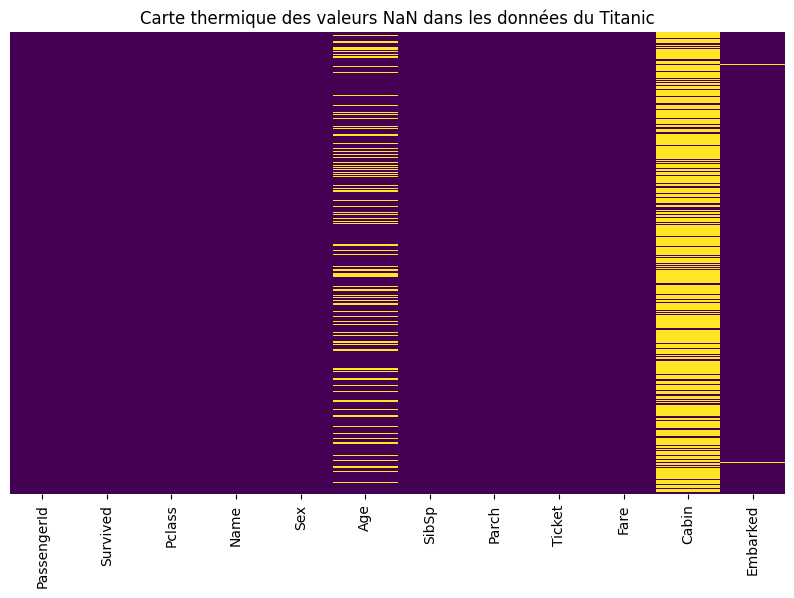

In [3]:
# Import des bibliothèques nécessaires pour la visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Tracer la carte thermique des valeurs NaN
plt.figure(figsize=(10, 6))  # Taille de la figure
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)  # isnull() crée un masque booléen pour NaN
plt.title("Carte thermique des valeurs NaN dans les données du Titanic")
plt.show()

In [4]:
# Calculer le pourcentage de valeurs manquantes dans la colonne 'Age'
age_nan_percentage = titanic_data['Age'].isna().mean() * 100

print(f"Le pourcentage des valeurs manquantes dans la colonne 'Age' est de : {age_nan_percentage:.2f}%")

Le pourcentage des valeurs manquantes dans la colonne 'Age' est de : 19.87%


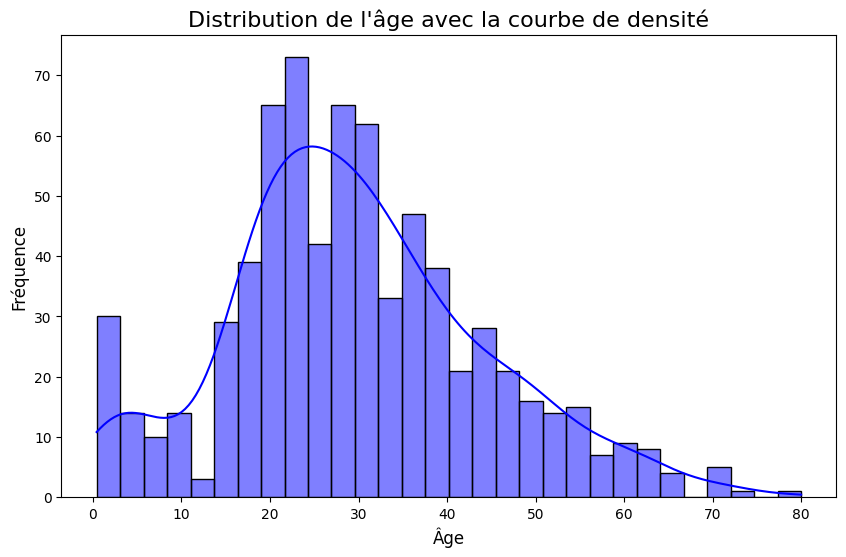

In [5]:
# Importer les bibliothèques nécessaires pour la visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Tracer l'histogramme de la colonne 'Age' et ajouter une courbe de densité
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Age'].dropna(), kde=True, color='blue', bins=30)

plt.title('Distribution de l\'âge avec la courbe de densité', fontsize=16)
plt.xlabel('Âge', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.show()

In [6]:
# Calculer la moyenne et la médiane de la colonne 'Age'
mean_age = titanic_data['Age'].mean()
median_age = titanic_data['Age'].median()

print(f'Moyenne de l\'âge: {mean_age:.2f}')
print(f'Médiane de l\'âge: {median_age:.2f}')

Moyenne de l'âge: 29.70
Médiane de l'âge: 28.00


In [7]:
# Calculer le pourcentage de valeurs NaN dans la colonne 'Cabin'
cabin_nan_percentage = titanic_data['Cabin'].isna().mean() * 100

print(f'Pourcentage des valeurs NaN dans la colonne "Cabin": {cabin_nan_percentage:.2f}%')

Pourcentage des valeurs NaN dans la colonne "Cabin": 77.10%


C:\Users\33782\AppData\Local\Temp\ipykernel_16972\3744999483.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic_data, x='Embarked', palette='Set2')


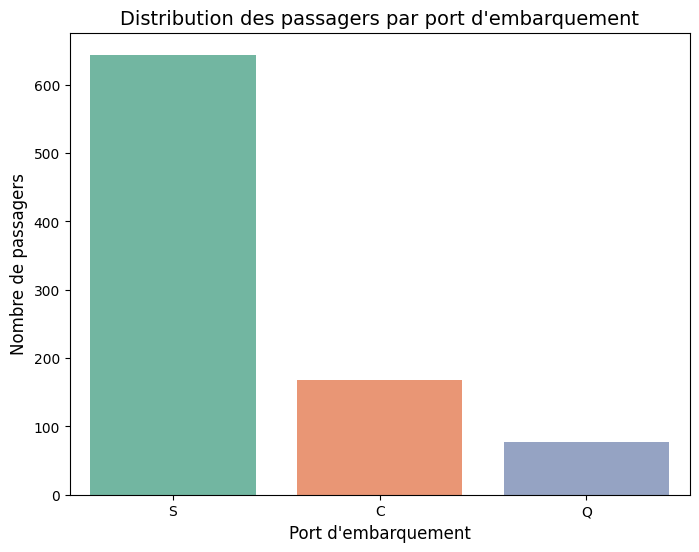

In [8]:
# Importer la bibliothèque pour le tracé
import seaborn as sns
import matplotlib.pyplot as plt

# Tracer la distribution de la colonne 'Embarked'
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='Embarked', palette='Set2')

plt.title('Distribution des passagers par port d\'embarquement', fontsize=14)
plt.xlabel('Port d\'embarquement', fontsize=12)
plt.ylabel('Nombre de passagers', fontsize=12)
plt.show()

In [9]:
# Appliquer le prétraitement
# Imputation des valeurs manquantes

# Imputer la colonne 'Age' avec la médiane (28 dans ce cas)
titanic_data['Age'].fillna(28, inplace=True)

# Imputer la colonne 'Embarked' avec le mode (valeur la plus fréquente) - ici 'S'
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Ignorer la colonne 'Cabin' car elle a trop de valeurs manquantes
titanic_data.drop('Cabin', axis=1, inplace=True)

# Vérifier les résultats après imputation
# Afficher le pourcentage de valeurs NaN restantes pour chaque colonne
nan_percentages = titanic_data.isnull().mean() * 100
print("Pourcentage de valeurs manquantes dans chaque colonne après prétraitement :")
print(nan_percentages)

# Afficher les premières lignes du dataset pour voir les modifications
print("\nAperçu des premières lignes du dataset après prétraitement :")
print(titanic_data.head())

Pourcentage de valeurs manquantes dans chaque colonne après prétraitement :
PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

Aperçu des premières lignes du dataset après prétraitement :
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, M

C:\Users\33782\AppData\Local\Temp\ipykernel_16972\1772601525.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(28, inplace=True)
C:\Users\33782\AppData\Local\Temp\ipykernel_16972\1772601525.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

C:\Users\33782\AppData\Local\Temp\ipykernel_16972\283496326.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(28, inplace=True)


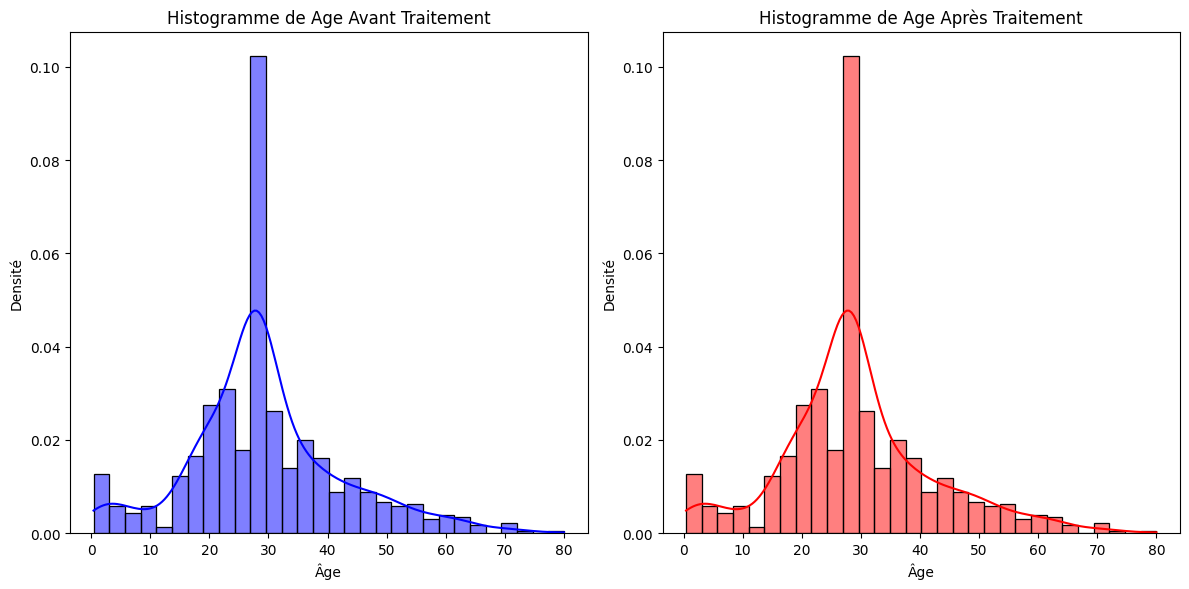

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Avant le traitement, stocker les valeurs d'âge d'origine pour comparaison
original_age = titanic_data['Age'].copy()

# Appliquer le prétraitement
# Imputer la colonne 'Age' avec la médiane (28 dans ce cas)
titanic_data['Age'].fillna(28, inplace=True)

# Créer un graphique avec deux histogrammes superposés
plt.figure(figsize=(12, 6))

# Histogramme avant traitement (original)
plt.subplot(1, 2, 1)
sns.histplot(original_age, kde=True, color='blue', stat='density', bins=30)
plt.title('Histogramme de Age Avant Traitement')
plt.xlabel('Âge')
plt.ylabel('Densité')

# Histogramme après traitement
plt.subplot(1, 2, 2)
sns.histplot(titanic_data['Age'], kde=True, color='red', stat='density', bins=30)
plt.title('Histogramme de Age Après Traitement')
plt.xlabel('Âge')
plt.ylabel('Densité')

# Afficher le graphique
plt.tight_layout()
plt.show()

In [11]:
# Créer la fonctionnalité "TravelAlone"
titanic_data['TravelAlone'] = (titanic_data['SibSp'] + titanic_data['Parch'] == 0).astype(int)

# Vérifier les premiers enregistrements pour voir le résultat
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  TravelAlone  
0      0         A/5 21171   7.2500        S            0  
1      0          PC 17599  71.2833        C            0  
2      0  STON/O2. 3101282   7.9250        S            1  
3      0            113803  53.1000        S            0  
4      0            

In [12]:
import pandas as pd

# Sélectionner les colonnes nécessaires pour l'encodage
df = titanic_data[['PassengerId', 'Survived', 'Name', 'Age', 'Ticket', 'Fare', 'TravelAlone', 'Pclass', 'Embarked', 'Sex']]

# Créer des variables dummy pour les colonnes catégorielles
df_encoded = pd.get_dummies(df, columns=['Pclass', 'Embarked', 'Sex'], drop_first=True)

# Afficher le dataframe résultant
print(df_encoded.head())

   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

    Age            Ticket     Fare  TravelAlone  Pclass_2  Pclass_3  \
0  22.0         A/5 21171   7.2500            0     False      True   
1  38.0          PC 17599  71.2833            0     False     False   
2  26.0  STON/O2. 3101282   7.9250            1     False      True   
3  35.0            113803  53.1000            0     False     False   
4  35.0            373450   8.0500            1     False      True   

   Embarked_Q  Embarked_S  Sex_male  
0       False        True      True  
1       False       Fa

In [13]:
# Supprimer les colonnes non nécessaires
df_encoded_cleaned = df_encoded.drop(columns=['PassengerId', 'Name', 'Ticket'])

# Afficher le dataframe résultant
print(df_encoded_cleaned.head())

   Survived   Age     Fare  TravelAlone  Pclass_2  Pclass_3  Embarked_Q  \
0         0  22.0   7.2500            0     False      True       False   
1         1  38.0  71.2833            0     False     False       False   
2         1  26.0   7.9250            1     False      True       False   
3         1  35.0  53.1000            0     False     False       False   
4         0  35.0   8.0500            1     False      True       False   

   Embarked_S  Sex_male  
0        True      True  
1       False     False  
2        True     False  
3        True     False  
4        True      True  
